In [ ]:
# Classifier of image as morph or bonafide by counting percentage of near green pixels using Error Level Analysis
# [ All bonafides & morphs are to be converted to 512px * 512px ]

In [ ]:
import os

In [ ]:
#Mount the directory where images are kept
#Our Nomenclature (Bonafides have names like "Copy of s1") (morphs are like "s1s2" i.e. morph of s1 and s2)
#[s1: subject 1] [s12s34: morph of subject s12 and s34]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/1_created_morphs_512x512')

In [ ]:
!pwd

/content/drive/MyDrive/1_created_morphs_512x512


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Statistical & Descriptive Code

In [ ]:
import cv2
import math
from PIL import Image, ImageChops, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt

#  *****************************************************************  FUNCTION DEFINATIONS ********************************************************

def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'

    image = Image.open(path).convert('RGB')

    #resized_image = image.resize(size=(512, 512))                   # <<<<<<<<<<<<<<<<<<<<<<<< WE'RE RESIZING THE IMAGE

    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)

    #plt.imshow(ela_image),plt.show()  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    return ela_image


#**********************************   Biggest Contour ***********************************

def find_biggest_contour(image, lower_bound, upper_bound):
    # Convert image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # #one time code to save files
    # output_folder='/content/drive/MyDrive/ELA_HSV_Images/Morphs'
    # output_path = os.path.join(output_folder, f"{name}.png")
    # # Save the HSV image
    # cv2.imwrite(output_path, hsv_image)
    # #one time code to save files


    # Threshold the image to get only green pixels
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    ff=0  # no.of contours
    ff=len(contours)
    #print(ff)  #ff --> No of contours

    # Initialize variables to keep track of the biggest rectangle
    max_area = 0
    max_rect = (0, 0, 0, 0, 0)  # (left, upper, width, height)

    # Iterate through each contour
    for contour in contours:
        # Get the bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Calculate the area of the rectangle
        area = w * h

        # Update the maximum rectangle if necessary
        if area > max_area:
            max_area = area
            max_rect = (x, y, w, h, ff)


    return max_rect



# *********************************************************************** Driver Function ********************************************************************

lower= np.array([0,84,0])
upper= np.array([62,147,60])

# Bonafides ******************

print("")
print("************************************* Test For Bonafides *******************************************************************")
print("")
#print(" Biggest Contour size in px*px ")
#print("")

# We have used percentage * 100;

path = "/content/drive/MyDrive/0_raw_bonafides/"

correct1 =0
total1=0
correct2 =0
total2=0


for i in range(1,508):
  real_image_path = path+"s"+str(i)+".png"
  name="s"+str(i)
  imgg2=convert_to_ela_image(real_image_path, 90)

  width2, height2 = imgg2.size
  total_pixels = width2 * height2

  # Biggest Contour
  image_np2 = np.array(imgg2)
  if len(image_np2.shape) == 3 and image_np2.shape[2] == 3:
    image_np2 = cv2.cvtColor(image_np2, cv2.COLOR_RGB2BGR)
  biggest_contour = find_biggest_contour(image_np2, lower, upper)
  # Output the size of the biggest contour
  size_of_biggest_contour = biggest_contour[2] * biggest_contour[3]

  GP=(size_of_biggest_contour/total_pixels)*100*100
  GPR= round(GP, 2)
  #print(name,": Contour size : ", size_of_biggest_contour," |  % Pixels: ",GPR," | no of contours: ",biggest_contour[4])                             #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<




  if(size_of_biggest_contour>=50):  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  50 se bada max contour: Bonafide   [size of biggest contour]
    correct1=correct1+1
  # else:
  #   print(real_image_path,size_of_biggest_contour)
  total1=total1+1

  if(biggest_contour[4]>=5500):  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  5500 se zyada contours: Bonafide   [no of contours]
    correct2=correct2+1
  # else:
  #   print(real_image_path,biggest_contour[4])
  total2=total2+1



print("")
print("Total Bonafides Tested: ",total1)
print("")
f=(correct1/total1)*100
f=round(f,2)
print("Accuracy using biggest contour: ",f)

print("")
print("")
print("Total Bonafides Tested: ",total2)
print("")
g=(correct2/total2)*100
g=round(g,2)
print("Accuracy using no of contour: ",g)

#Morphs ******************

correct1 =0
total1=0
correct2 =0
total2=0

print("")
print("************************************* Test For Morphs *******************************************************************")
print("")
#print(" Biggest Contour size in px*px ")
#print("")

path = "/content/drive/MyDrive/1_created_morphs_512x512/"



for i in range(2,47,2):
  for j in range(i+1,201,20):
    real_image_path = path+"s"+str(i)+"s"+str(j)+".png"  #path + image_filename  (image_filenames are s1,s2.....)
    name="s"+str(i)+"s"+str(j)
    if(cv2.imread(real_image_path)) is not None:
      imgg2=convert_to_ela_image(real_image_path, 90)

      width2, height2 = imgg2.size
      total_pixels = width2 * height2

      # Biggest Contour
      image_np2 = np.array(imgg2)
      if len(image_np2.shape) == 3 and image_np2.shape[2] == 3:
        image_np2 = cv2.cvtColor(image_np2, cv2.COLOR_RGB2BGR)
      biggest_contour = find_biggest_contour(image_np2, lower, upper)
      # Output the size of the biggest contour
      size_of_biggest_contour = biggest_contour[2] * biggest_contour[3]

      GP=(size_of_biggest_contour/total_pixels)*100*100
      GPR= round(GP, 2)
      #print(name,": Contour size : ", size_of_biggest_contour," |  % Pixels: ",GPR," | no of contours: ",biggest_contour[4])                            #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<


      if(size_of_biggest_contour<50):  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  50 se chota max contour: Morph [size of biggest contour]
        correct1=correct1+1
      # total1=total1+1
      # else:
      #   print("Failed using 'biggest contour': ",name)
      total1=total1+1

      if(biggest_contour[4]<=5500):  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  5500 se kum contours: Morph  [no of contours]
        correct2=correct2+1
      # else:
      #   print("Failed using 'no of contour': ",name)
      total2=total2+1


print("")
print("Total Morphs Tested: ",total1)
print("")
f=(correct1/total1)*100
f=round(f,2)
print("Accuracy using biggest contour: ",f)

print("")
print("")
print("Total Morphs Tested: ",total2)
print("")
g=(correct2/total2)*100
g=round(g,2)
print("Accuracy using no of contour: ",g)


************************************* Test For Bonafides *******************************************************************


Total Bonafides Tested:  507

Accuracy using biggest contour:  98.82


Total Bonafides Tested:  507

Accuracy using no of contour:  99.8

************************************* Test For Morphs *******************************************************************


Total Morphs Tested:  210

Accuracy using biggest contour:  74.76


Total Morphs Tested:  210

Accuracy using no of contour:  95.71


In [ ]:
# Chota code for rough work ↓↓↓


ELA


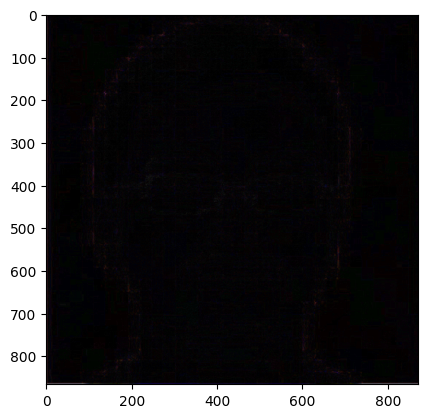


HSV Image


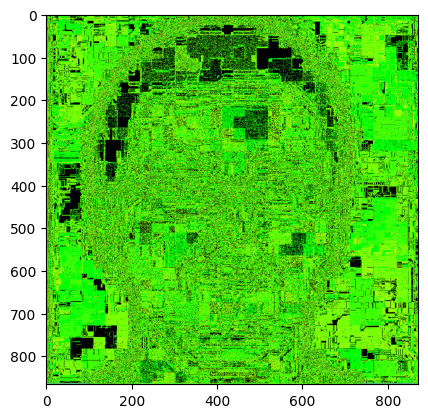


Mask in color range


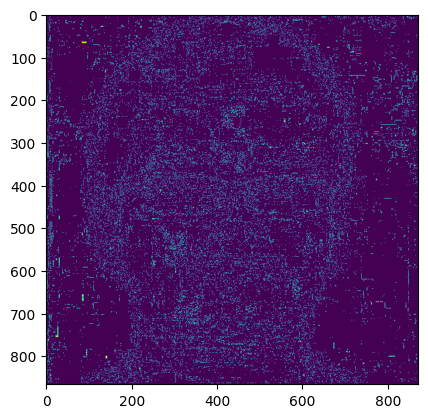


Actual Image


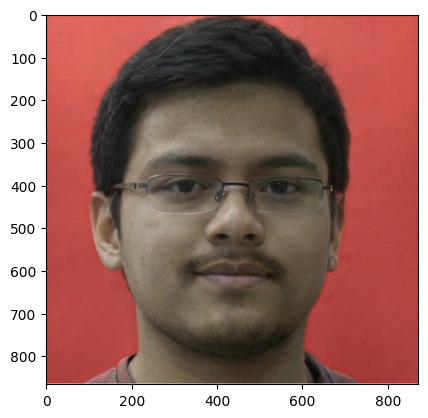



Contour Size in px*px:  306


No of contours:  19829



In [ ]:
import cv2
import math
from PIL import Image, ImageChops, ImageEnhance
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#***********************************************************
def convert_to_ela_image(path, quality):
    temp_filename = 'temp_file_name.jpg'
    ela_filename = 'temp_ela.png'

    image = Image.open(path).convert('RGB')

    #resized_image = image.resize(size=(512, 512))

    image.save(temp_filename, 'JPEG', quality = quality)
    temp_image = Image.open(temp_filename)

    ela_image = ImageChops.difference(image, temp_image)

    extrema = ela_image.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    ela_image = ImageEnhance.Brightness(ela_image).enhance(scale)
    print("")
    print("ELA")
    plt.imshow(ela_image),plt.show()  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
    return ela_image


def find_biggest_contour(image, lower_bound, upper_bound):
    # Convert image to HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    print("")
    print("ELA + HSV Image")
    plt.imshow(hsv_image),plt.show()

    # Threshold the image to get only green pixels
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
    print("")
    print("ELA+ HSV + Mask in color range")
    plt.imshow(mask),plt.show()

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    ff=0  # no.of contours
    ff=len(contours)
    #print(ff)

    # Initialize variables to keep track of the biggest rectangle
    max_area = 0
    max_rect = (0, 0, 0, 0, 0)  # (left, upper, width, height)

    # Iterate through each contour
    for contour in contours:
        # Get the bounding rectangle of the contour
        x, y, w, h = cv2.boundingRect(contour)

        # Calculate the area of the rectangle
        area = w * h

        # Update the maximum rectangle if necessary
        if area > max_area:
            max_area = area
            max_rect = (x, y, w, h, ff)


    return max_rect


#***********************************************************

lower_green = np.array([0,84,0])
upper_green = np.array([62,147,60])
# upper_green = np.array([60,255,60])

path = "/content/"
# path = "/content/drive/MyDrive/0_raw_bonafides/"            # <<<<<<<<< Bonafide
# path = "/content/drive/MyDrive/4_landmark_morphs/"
# path = "/content/drive/MyDrive/1_created_morphs_512x512/"   # <<<<<<<<< Morph

real_image_path = path+"s257s261"+".png"
# real_image_path = path+"s1"+".png"                           # <<<<<<<<< Bonafide
# real_image_path = path+"morph104"+".png"                         # <<<<<<<<< Morph
# real_image_path = path+"s2s24"+".png"

imgg2=convert_to_ela_image(real_image_path, 90)

width2, height2 = imgg2.size
total_pixels = width2 * height2

# Biggest Green Rectangle
image_np2 = np.array(imgg2)

if len(image_np2.shape) == 3 and image_np2.shape[2] == 3:
  image_np2 = cv2.cvtColor(image_np2, cv2.COLOR_RGB2BGR)
biggest_contour = find_biggest_contour(image_np2, lower_green, upper_green)
size_of_biggest_contour = biggest_contour[2] * biggest_contour[3]
GP=(size_of_biggest_contour/total_pixels)*100*100
GPR= round(GP, 2)



print("")
print("Actual Image")
image = Image.open(real_image_path).convert('RGB')
plt.imshow(image),plt.show()
print("")



print("")
print("Actual Image ka Contour")
#contours

image_np2 = np.array(image)

if len(image_np2.shape) == 3 and image_np2.shape[2] == 3:
        image_np2 = cv2.cvtColor(image_np2, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(image_np2, cv2.COLOR_RGBA2GRAY)
cannyEdge = cv2.Canny(gray, 40, 200)
contours, hierarchy = cv2.findContours(cannyEdge, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image_np2, contours, -1, (0, 255, 0), 3)

cv2_imshow(image_np2)
cv2.waitKey(0)
print("")

print("")
print("ELA + HSV + Mask Image ka Contour")

#contours
image_np2 = np.array(imgg2)

if len(image_np2.shape) == 3 and image_np2.shape[2] == 3:
        image_np2 = cv2.cvtColor(image_np2, cv2.COLOR_RGB2BGR)
gray = cv2.cvtColor(image_np2, cv2.COLOR_RGBA2GRAY)

hsv_image = cv2.cvtColor(image_np2, cv2.COLOR_RGB2HSV)
lower_bound = np.array([0,84,0])
upper_bound = np.array([62,147,60])
# Threshold the image to get only green pixels
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image_np2, contours, -1, (0, 255, 0), 3)

cv2_imshow(image_np2)
cv2.waitKey(0)
print("")

print("")
print("Max contour Size in px*px: ", size_of_biggest_contour)
print("")

print("")
print("No of contours: ", biggest_contour[4])
print("")

print(" ")
print("Using Size of biggest Contour")
if(size_of_biggest_contour<50):  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  50 se chota max contour: Morph [size of biggest contour]
  print("It's a Morph")
else:
  print("It's a Bonafide")

print(" ")
print("Using No of contours")
if(biggest_contour[4]<=5500):  #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<  5500 se kum contours: Morph  [no of contours]
  print("It's a Morph")
else:
  print("It's a Bonafide")


In [ ]:
#Screenshot Testing

In [ ]:
pip install exifread

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from PIL import Image
from PIL.ExifTags import TAGS

def extract_metadata(image_path):
    try:
        with Image.open(image_path) as img:
            metadata = {}
            raw_data = img._getexif()
            if raw_data is not None:
                for tag, value in raw_data.items():
                    tag_name = TAGS.get(tag, tag)
                    metadata[tag_name] = value
                for tag, value in metadata.items():
                  print(f"{tag}: {value}")
            else:
                print("No EXIF metadata found in the image.")

    except Exception as e:
        print(f"Error extracting metadata: {e}")

print("")
print("1. Windows Screenshot (Snipping tool)")
image_path = "/content/drive/MyDrive/s1.png"
metadata = extract_metadata(image_path)


print("")
print("2. Windows Screenshot (Normal screenshot)")
image_path = "/content/drive/MyDrive/s2.png"
metadata = extract_metadata(image_path)


print("")
print("3. Mac's Screenshot")

image_path = "/content/drive/MyDrive/1_created_morphs_512x512/s1s22.png"
metadata = extract_metadata(image_path)


print("")
print("4. Normal Image, not a screenshot")
image_path = "/content/drive/MyDrive/0_raw_bonafides/s1.png"
metadata = extract_metadata(image_path)




1. Windows Screenshot (Snipping tool)
No EXIF metadata found in the image.

2. Windows Screenshot (Normal screenshot)
No EXIF metadata found in the image.

3. Mac's Screenshot
ResolutionUnit: 2
ExifOffset: 78
XResolution: 144.0
YResolution: 144.0
ExifImageWidth: 872
ExifImageHeight: 866
UserComment: b'ASCII\x00\x00\x00Screenshot'

4. Normal Image, not a screenshot
No EXIF metadata found in the image.
